In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-store-product-details/Salesstore.csv


In [2]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#creating a filepath for my data
filepath = '../input/sales-store-product-details/Salesstore.csv'

#reading the filepathinto a csv dataframe
sales_data = pd.read_csv(filepath, index_col = 'Order_ID')
sales_data.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
Order_ID,,,,,,,,,,,,
643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [4]:
#detecting missing values in the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 643 to 20003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_Priority        730 non-null    object 
 1   Order_Quantity        730 non-null    int64  
 2   Sales                 730 non-null    float64
 3   Ship_Mode             730 non-null    object 
 4   Profit                730 non-null    float64
 5   Customer_Name         730 non-null    object 
 6   Region                730 non-null    object 
 7   Customer_Segment      730 non-null    object 
 8   Product_Category      730 non-null    object 
 9   Product_Sub-Category  730 non-null    object 
 10  Product_Name          730 non-null    object 
 11  Product_Container     730 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 74.1+ KB


**Visualization Assignment**

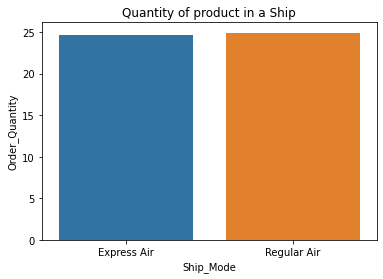

In [5]:
#which ship mode is mostly used when certain quantity are ordered
sns.barplot(x = 'Ship_Mode', y = 'Order_Quantity', data = sales_data, ci = None)
plt.title('Quantity of product in a Ship')
plt.show()

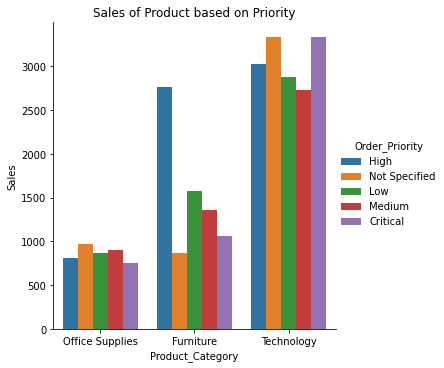

In [6]:
#what category of product based on order priority has highest sales
sns.catplot(x = 'Product_Category', y = 'Sales', data = sales_data, hue = 'Order_Priority', kind = 'bar', ci = None)
plt.title('Sales of Product based on Priority')
plt.show()

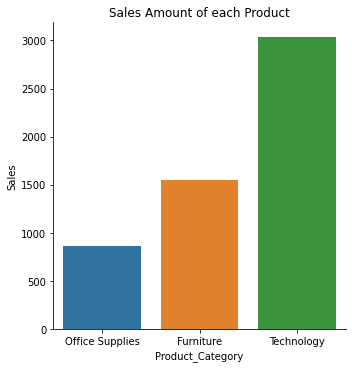

In [7]:
#what is the sales of each product category
sns.catplot(x = 'Product_Category', y = 'Sales', data = sales_data, ci = None, kind = 'bar')
plt.title('Sales Amount of each Product')
plt.show()

**From the graph above we can see that Technology has the highest sales record,
followed by Furniture. Let check product that has the highest profit.**

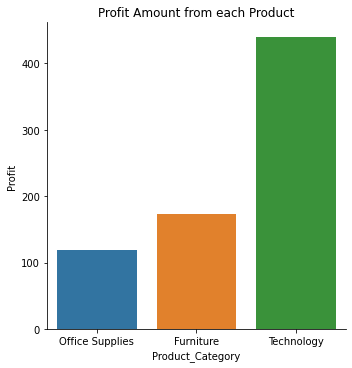

In [8]:
#what is the profit gotten from each product
sns.catplot(x = 'Product_Category', y = 'Profit', data = sales_data, kind = 'bar', ci = None)
plt.title('Profit Amount from each Product')
plt.show()

**This graph above shows that Technology Product also has the highest profit,
followed by Furniture, this may also showcase that there is a relationship between sales and profit.**

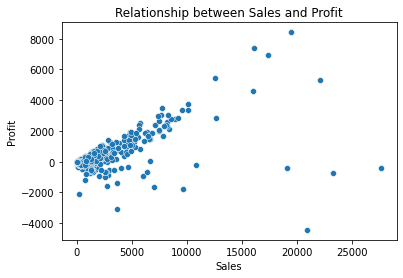

In [9]:
#checking the relationship that exist betwwen sales and profit
#There is a close positive linear relationship between sales and profit.
#But note that there are some sales that brought about loss.
sns.scatterplot(x = 'Sales', y = 'Profit', data = sales_data)
plt.title('Relationship between Sales and Profit')
plt.show()

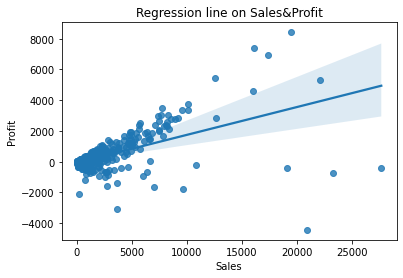

In [10]:
#fitting a regression line on the scatter plot
sns.regplot(x = 'Sales', y = 'Profit', data = sales_data)
plt.title('Regression line on Sales&Profit')
plt.show()

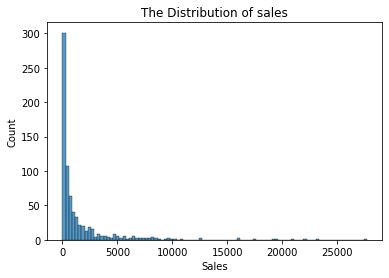

In [11]:
#checking the distribution of the sales column
#it is skewed to the right
sns.histplot(sales_data['Sales'])
plt.title('The Distribution of sales')
plt.show()


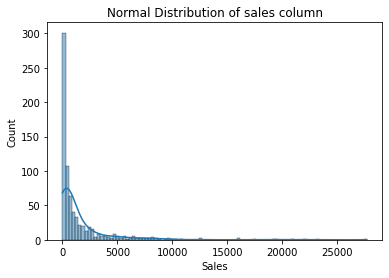

In [12]:
#plotting a normal distribution curve of the sales column
sns.histplot(sales_data['Sales'], kde = True)
plt.title('Normal Distribution of sales column')
plt.show()

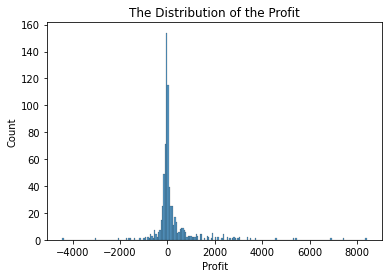

In [13]:
#how distributed is the profit
sns.histplot(sales_data['Profit'])
plt.title('The Distribution of the Profit')
plt.show()

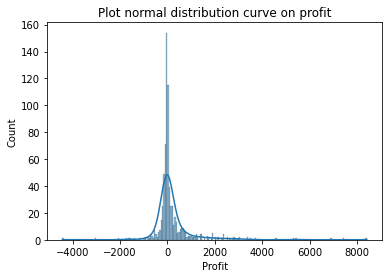

In [14]:
#plotting normal distribution on the profit column
sns.histplot(sales_data['Profit'], kde = True)
plt.title('Plot normal distribution curve on profit')
plt.show()

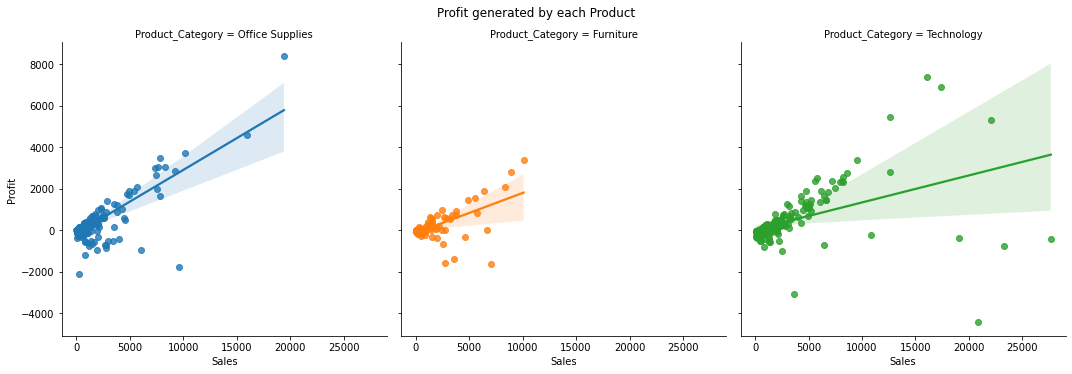

In [15]:
#detceting the profit of each product separately
g = sns.lmplot(x = 'Sales', y = 'Profit',hue = 'Product_Category', col = 'Product_Category', data = sales_data)
g.fig.suptitle('Profit generated by each Product', y = 1.03)
plt.show()

**Note that each product category has negative profit, and technology has the largest negative profit.**

In [16]:
#finding the minimum value of sales and profit for each Product.
sales_data.groupby('Product_Category')['Sales', 'Profit'].min()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Sales,Profit
Product_Category,,
Furniture,12.74,-1640.51
Office Supplies,8.60,-2088.68
Technology,42.31,-4437.91


In [17]:
sales_data.head(3)

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
Order_ID,,,,,,,,,,,,
643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box


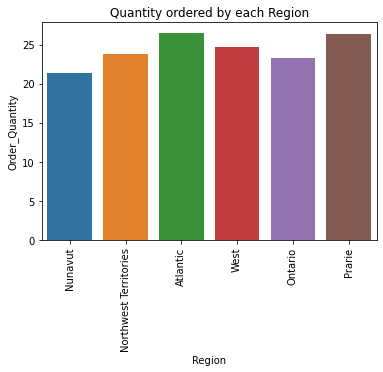

In [18]:
#what region ordered the hidhest quantity
sns.barplot(x = 'Region', y ='Order_Quantity', data = sales_data, ci = None)
plt.xticks(rotation = 90)
plt.title('Quantity ordered by each Region')
plt.show()

**From the grahp above, Atlantic and Prarie has the highest ordering.
Questions: Does this high ordering depict high sales and profit?**

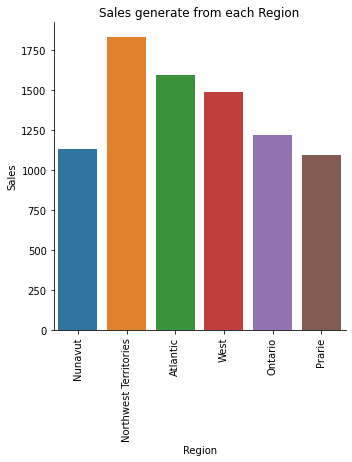

In [19]:
sns.catplot(x = 'Region', y = 'Sales', data = sales_data, ci = None, kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Sales generate from each Region')
plt.show()

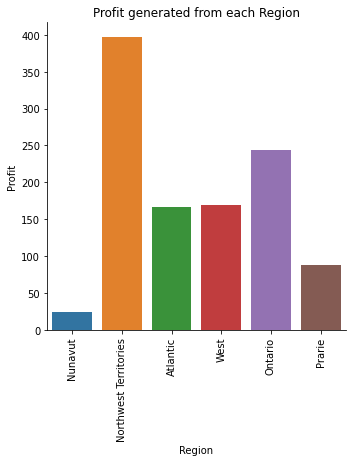

In [20]:
sns.catplot(x = 'Region', y = 'Profit', data = sales_data, ci = None, kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Profit generated from each Region')
plt.show()

**From the two graphs above the number of quantity ordered does not mean depict that
the particular Region with the highest order will have high profit and sales.
Northwest Territories has the highest sales and profit but not the highest
quantity ordered.**

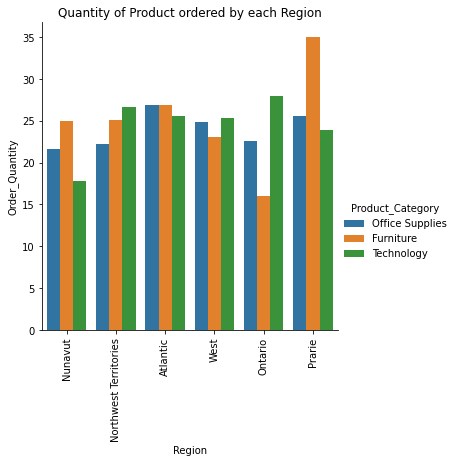

In [21]:
#let check the product category ordered by this regions.
sns.catplot(x = 'Region', y = 'Order_Quantity', kind = 'bar', hue = 'Product_Category', ci = None, data = sales_data)
plt.xticks(rotation = 90)
plt.title('Quantity of Product ordered by each Region')
plt.show()

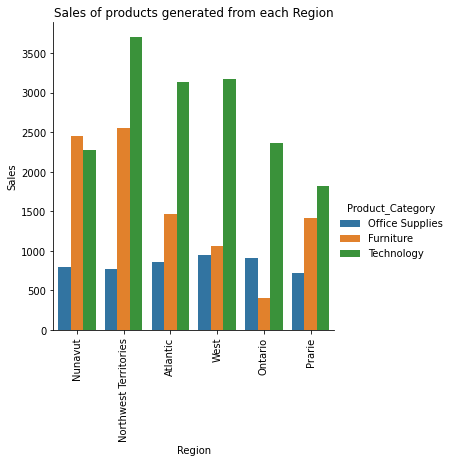

In [22]:
sns.catplot(x = 'Region', y = 'Sales', kind = 'bar', hue = 'Product_Category', ci = None, data = sales_data)
plt.xticks(rotation = 90)
plt.title('Sales of products generated from each Region')
plt.show()

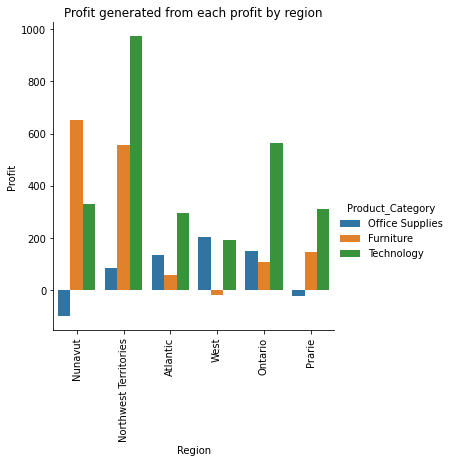

In [23]:
sns.catplot(x = 'Region', y = 'Profit', kind = 'bar', hue = 'Product_Category', ci = None, data = sales_data)
plt.xticks(rotation = 90)
plt.title('Profit generated from each profit by region')
plt.show()

In [24]:
sales_data.groupby('Product_Category')['Product_Container'].value_counts()

Product_Category  Product_Container
Furniture         Small Box             52
                  Large Box             28
                  Medium Box            18
Office Supplies   Small Box            412
                  Large Box             21
                  Medium Box            14
Technology        Small Box            142
                  Medium Box            29
                  Large Box             14
Name: Product_Container, dtype: int64

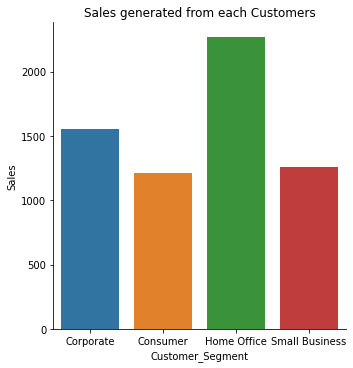

In [25]:
#which customer segment bought things
sns.catplot(x = 'Customer_Segment', y = 'Sales', data = sales_data, kind = 'bar', ci = None)
plt.title('Sales generated from each Customers')
plt.show()

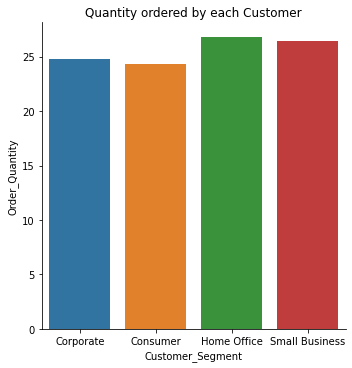

In [26]:
#which customer segment has the highest quantity order
sns.catplot(x = 'Customer_Segment', y = 'Order_Quantity', data = sales_data, kind = 'bar', ci = None)
plt.title('Quantity ordered by each Customer')
plt.show()

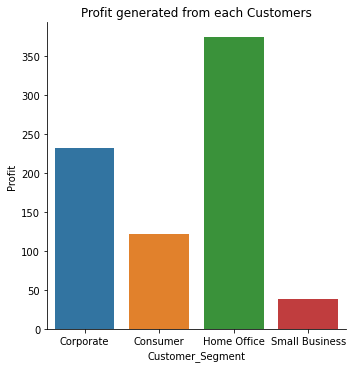

In [27]:
#which customer segment has the highest profit
sns.catplot(x = 'Customer_Segment', y = 'Profit', data = sales_data, kind = 'bar', ci = None)
plt.title('Profit generated from each Customers')
plt.show()

**From the graph above Home office has the highest quantity ordered, sales and profit.**


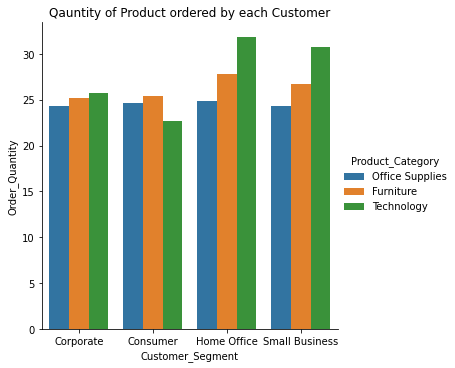

In [28]:
#what type of product was ordered by the Customers
#i need order quantity, product category, customer segment
sns.catplot(x = 'Customer_Segment', y = 'Order_Quantity', hue = 'Product_Category', data = sales_data, kind = 'bar', ci = None)
plt.title('Qauntity of Product ordered by each Customer')
plt.show()

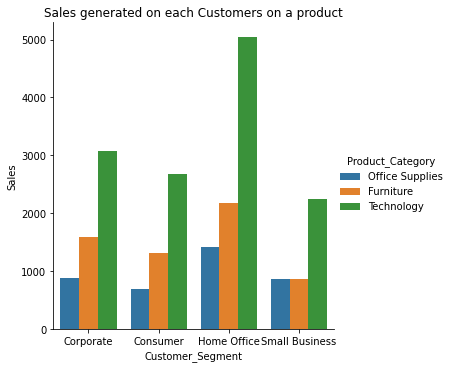

In [29]:
#what amount of sales was generated on each customer on a particular product
sns.catplot(x = 'Customer_Segment', y = 'Sales', hue = 'Product_Category', data = sales_data, kind = 'bar', ci = None)
plt.title('Sales generated on each Customers on a product')
plt.show()

Text(0.5, 1.0, 'Profit generate from each Customers on a Product')

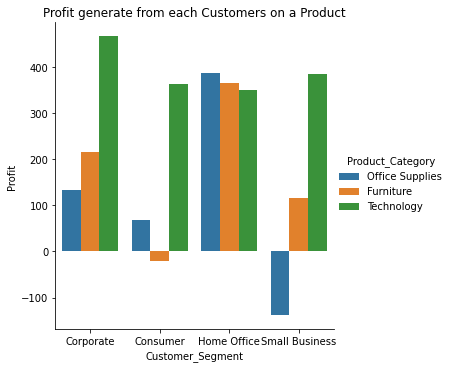

In [30]:
#what is the profit generated from each customers on a particular product
sns.catplot(x = 'Customer_Segment', y = 'Profit', hue = 'Product_Category', data = sales_data, kind = 'bar', ci = None)
plt.title('Profit generate from each Customers on a Product')

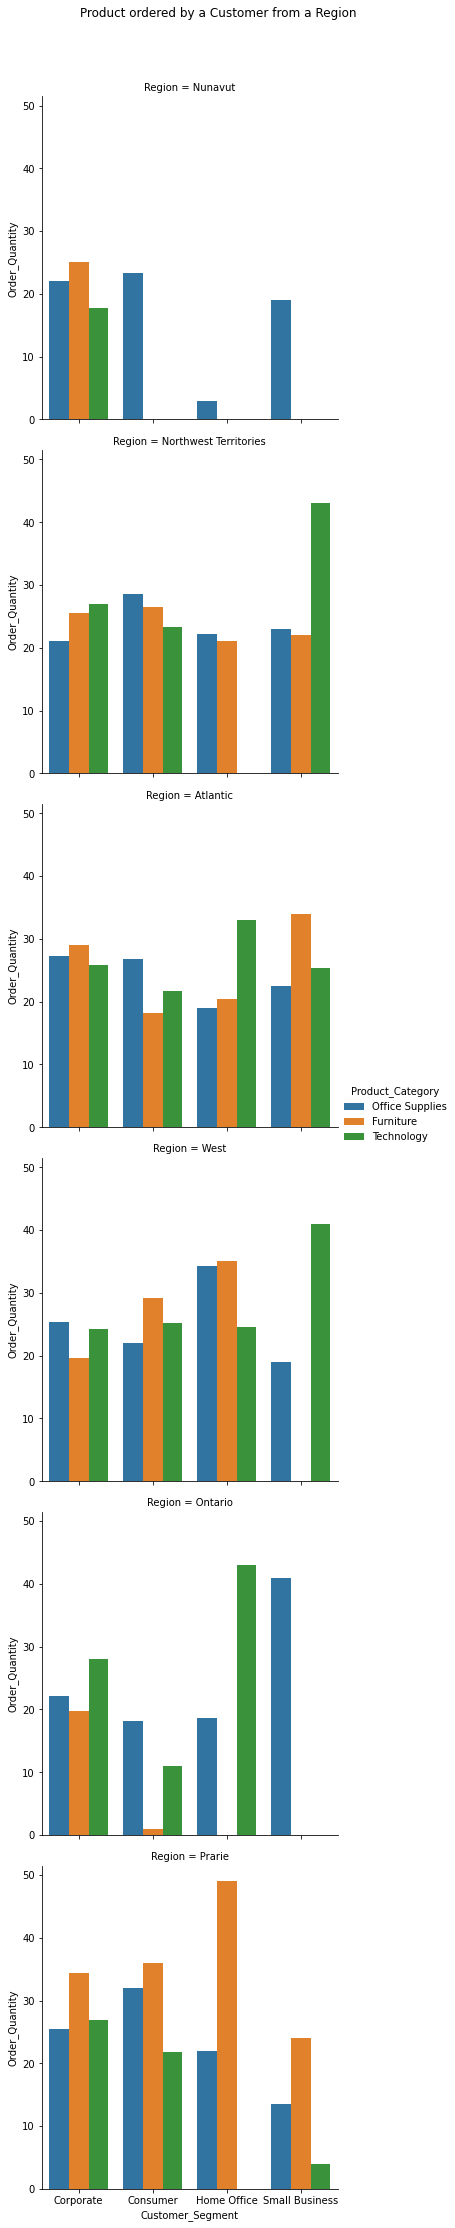

In [31]:
#what are the product quantity ordered by each customers from a particular region
m = sns.catplot(x = 'Customer_Segment', y = 'Order_Quantity', hue = 'Product_Category', row = 'Region', data = sales_data, kind = 'bar', ci = None)
m.fig.suptitle('Product ordered by a Customer from a Region', y = 1.03)
plt.show()

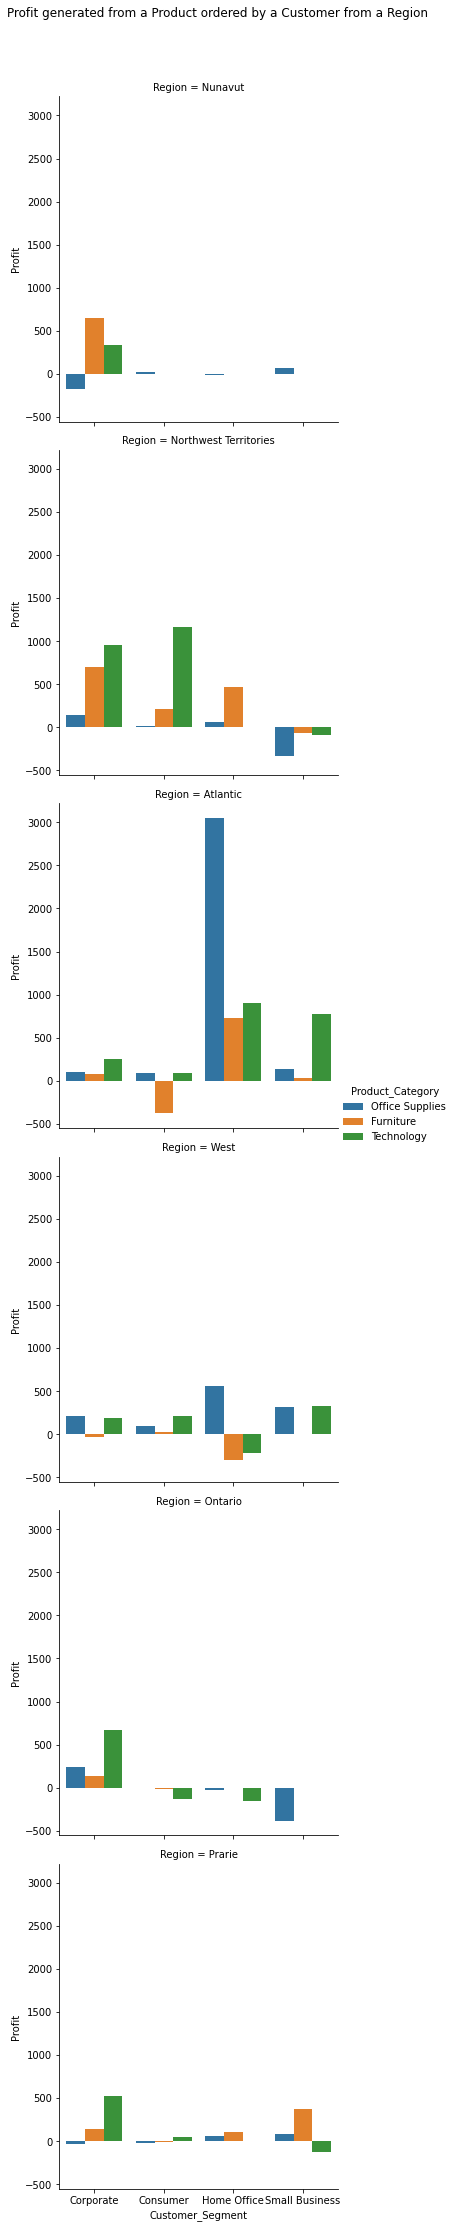

In [32]:
#what is the profit generated from a product,ordered by a customer from a praticular region
b = sns.catplot(x = 'Customer_Segment', y = 'Profit', hue = 'Product_Category', row = 'Region', data = sales_data, kind = 'bar', ci = None)
b.fig.suptitle('Profit generated from a Product ordered by a Customer from a Region', y = 1.03)
plt.show()

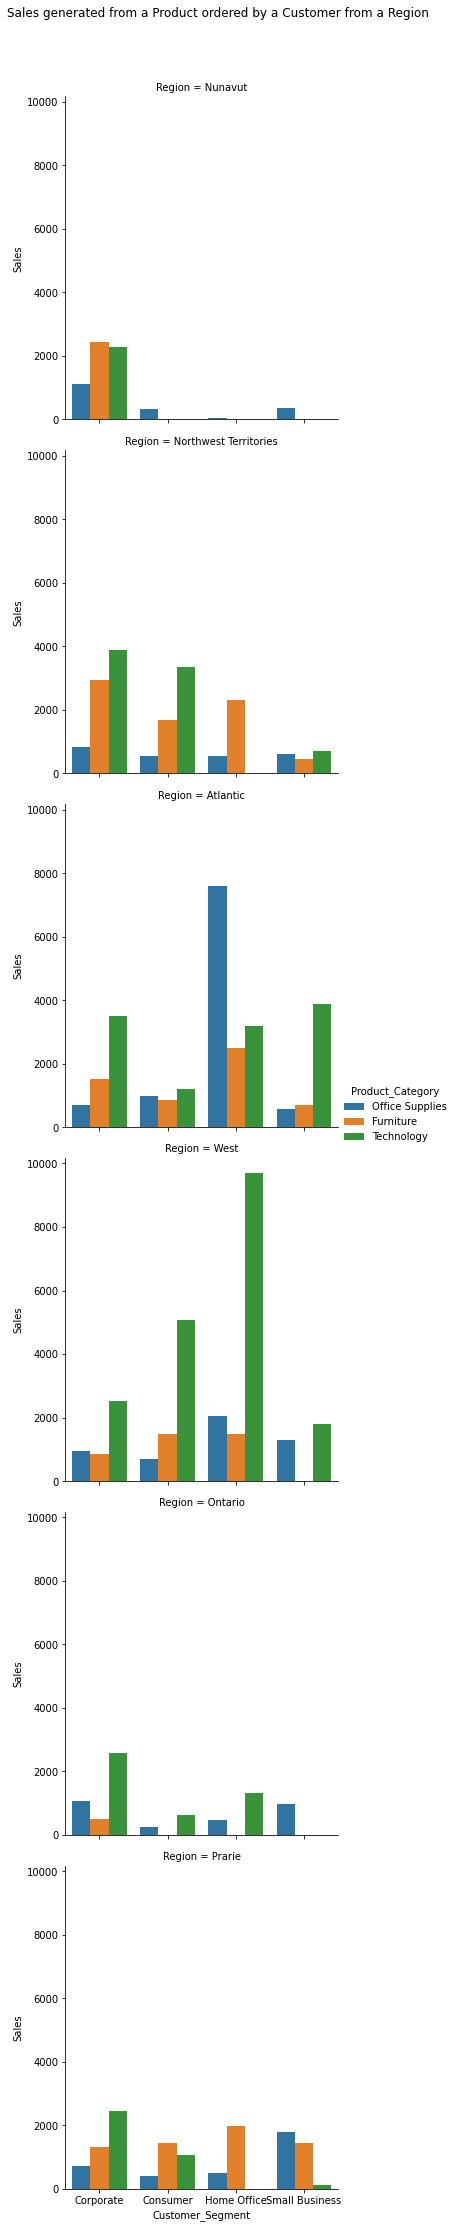

In [33]:
#what is the sales generated from a product,ordered by a customer from a praticular region
y= sns.catplot(x = 'Customer_Segment', y = 'Sales', hue = 'Product_Category', row = 'Region', data = sales_data, kind = 'bar', ci = None)
y.fig.suptitle('Sales generated from a Product ordered by a Customer from a Region', y = 1.03)
plt.show()

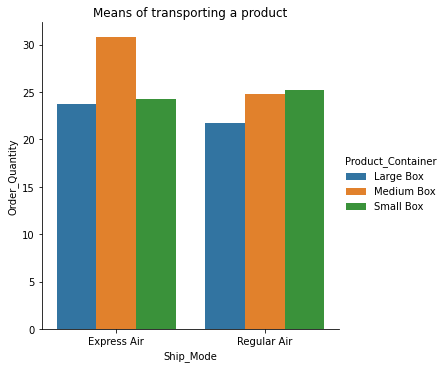

In [34]:
#what means was used to transport an order with a particular product-container.
sns.catplot(x = 'Ship_Mode' , y = 'Order_Quantity', hue = 'Product_Container', data = sales_data, kind = 'bar', ci = None)
plt.title('Means of transporting a product')
plt.show()

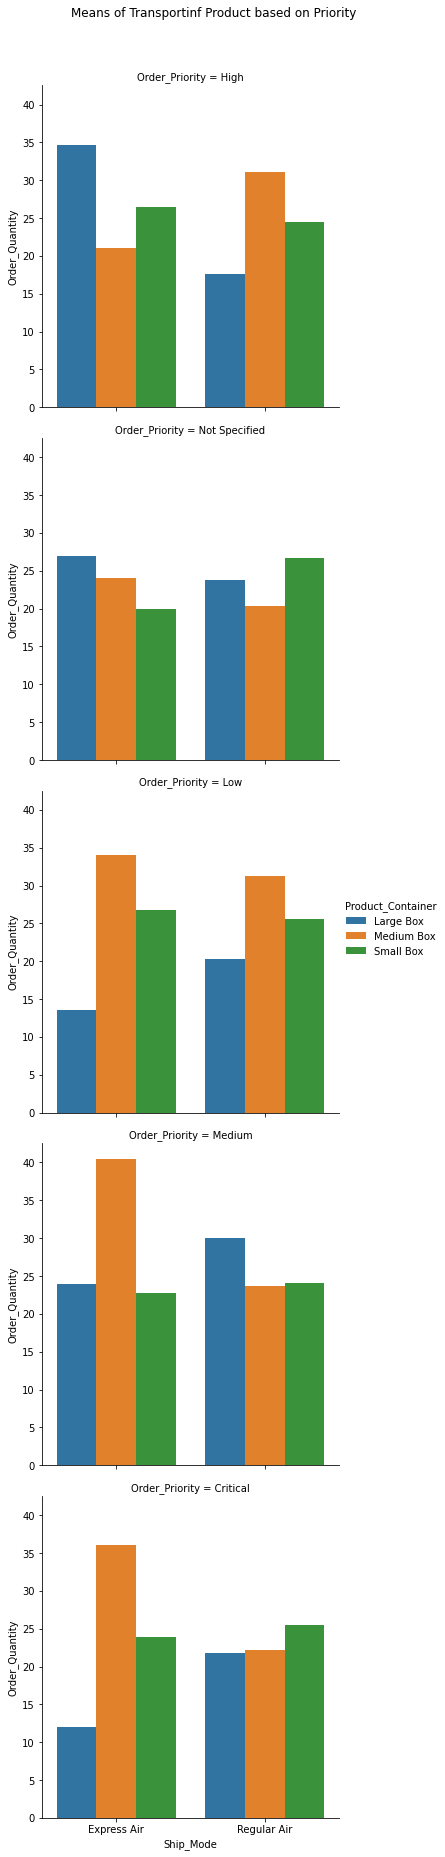

In [35]:
#Means of transportion product quantity based on product priority
a = sns.catplot(x = 'Ship_Mode' , y = 'Order_Quantity', hue = 'Product_Container', row = 'Order_Priority', data = sales_data, kind = 'bar', ci = None)
a.fig.suptitle('Means of Transportinf Product based on Priority', y = 1.03)
plt.show()

**Note that there are still inexhaustible questions to extract from the dataset.**